In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, distinct


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
engine.execute("SELECT * FROM measurement order by date ").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2725, 'USC00513117', '2010-01-01', 0.28, 67.0),
 (9008, 'USC00518838', '2010-01-01', 0.21, 72.0),
 (9519, 'USC00519523', '2010-01-01', 0.15, 75.0),
 (12188, 'USC00519281', '2010-01-01', 0.15, 70.0),
 (14960, 'USC00511918', '2010-01-01', 0.05, 66.0),
 (16939, 'USC00516128', '2010-01-01', 0.14, 73.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (2726, 'USC00513117', '2010-01-02', 0.0, 65.0),
 (9009, 'USC00518838', '2010-01-02', 0.02, 73.0),
 (9520, 'USC00519523', '2010-01-02', 0.0, 75.0),
 (12189, 'USC00519281', '2010-01-02', 0.0, 62.0),
 (14961, 'USC00511918', '2010-01-02', 0.0, 70.0),
 (16940, 'USC00516128', '2010-01-02', 0.0, 61.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (2727, 'USC00513117', '2010-01-03', 0.0, 75.0),
 (9010, 'USC00518838', '2010-01-03', 0.0, 67.0),
 (9521, 'USC00519523', '2010-01-03', 0.0, 77.0),
 (12190, 'USC00519281', '2010-01-03', 0.0, 74.0),
 (14962, 'USC00511918', '2010-01-03', 0.0, 75.0),
 (16941, 'USC

In [8]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
engine.execute("SELECT * FROM station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [10]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

most_recent_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
twelve_months_ago = (most_recent_date - dt.timedelta(days=365)).strftime('%Y-%m-%d')



print(f"Lookup Date: {twelve_months_ago}")

Lookup Date: 2016-08-23


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
#prcp_scores = session.query(*sel).filter(Measurement.date>=twelve_months_ago, Measurement.prcp!="None").group_by(Measurement.date).order_by(Measurement.date).all()
prcp_scores = session.query(*sel).filter(Measurement.date>=twelve_months_ago, Measurement.prcp!="None").order_by(Measurement.date).all()


prcp_scores

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_scores_df = pd.DataFrame(prcp_scores, columns=['Date', 'Precipitation Score'])
prcp_scores_df.set_index('Date', inplace=True)

# Sort the dataframe by date
prcp_scores_df = prcp_scores_df.sort_index()

prcp_scores_df

,Precipitation Score
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


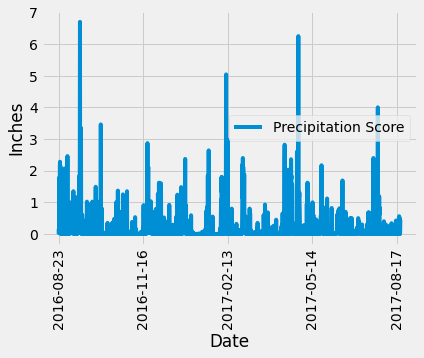

In [16]:
ax = prcp_scores_df.plot(rot=90)

ax.set_ylabel("Inches")
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_scores_df.describe()

,Precipitation Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
sel = [func.count(distinct(Measurement.station))]
num_stations = session.query(*sel).all()

print(f'There are {num_stations[0][0]} stations in the dataset.')

There are 9 stations in the dataset.


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.station)]
active_stations = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]

#most_active_station

sel = [Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs), func.count(Measurement.tobs)]
most_active_station_stats = session.query(*sel).filter(Measurement.station==most_active_station, Measurement.tobs!="None").group_by(Measurement.station).all()

most_active_station_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067, 2772)]

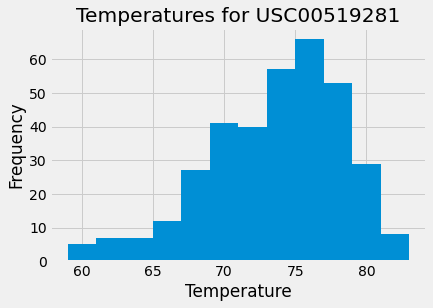

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date, Measurement.tobs]

most_active_station_temps = session.query(*sel).filter(Measurement.station==most_active_station, Measurement.date>=twelve_months_ago, Measurement.tobs!="None").order_by(Measurement.date).all()

most_active_station_temps

# Save the query results as a Pandas DataFrame and set the index to the date column
most_active_station_temps_df = pd.DataFrame(most_active_station_temps, columns=['Date', 'Temperature'])
most_active_station_temps_df.set_index('Date', inplace=True)

most_active_station_temps_df

hist = most_active_station_temps_df.hist(bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title(f"Temperatures for {most_active_station}")
plt.show()

# Close session

In [22]:
# Close Session
session.close()